# Rxday - one model

Precipitaiton extremes can be defined in many ways
Here we explore precipitation extremes from the perspective of 

extremes for individual gridboxes (rx1day, rx5day) for time period, averaged over the domain
(rx1day - maximum daily precipitation rate for each gridbox over a time period)
(rx5day - maximum 5 day rolling average precipitation rate for each gridbox over a time period)

extremes for the domain as a whole (high percentile daily precipitation rate) averaged over a time period


the metrics focus on annual extremes, averaged over the total time period
However, we also explore seasonal, and monthly metrics 

In [39]:
import xarray as xr
import numpy as np
import skimage.measure as skm
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

from os.path import expanduser
home = expanduser("~")

from cmip5_metrics.funcs.vars.myFuncs import *
from cmip5_metrics.funcs.vars.myPlots import *
from cmip5_metrics.funcs.prFuncs import *
from cmip5_metrics.funcs.aggFuncs import *

import timeit

switch = {
    'local_files': True, 
    'nci_files': False, 
}

In [40]:
models = [
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 # cannot concatanate files for rcp85 run
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]
model = models[0]


experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]       



if switch['local_files']:
    folder = home + '/Documents/data/cmip5/' + 'ds'
    fileName = model + '_precip_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    precip = ds.precip*60*60*24
    precip.attrs['units']= 'mm/day'

if switch['nci_files']:
    precip = get_pr(model, experiment).precip # from prVars


# precip
# plot_snapshot(precip.isel(time=0), 'Blues', 'precip', model) # from vars.myPlots


In [6]:
rxday

<xarray.Dataset>
Dimensions:  (time: 30, lat: 22, lon: 128)
Coordinates:
  * time     (time) object 1970-12-31 00:00:00 ... 1999-12-31 00:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    rx1day   (time, lat, lon) float32 9.972 13.62 9.293 ... 8.492 3.344 5.649
    rx5day   (time, lat, lon) float32 4.349 4.201 3.037 ... 2.593 1.927 3.121

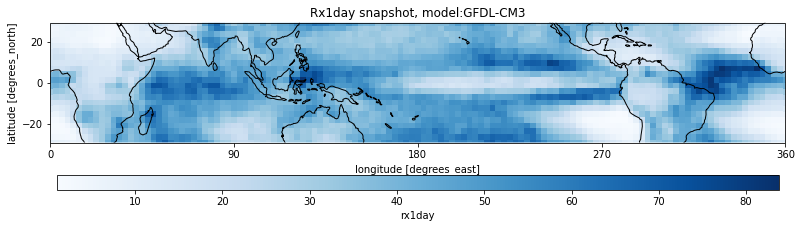

In [8]:
plot_snapshot(rxday.rx1day.mean(dim='time'), 'Blues', 'Rx1day', model)
# rxday.rx1day.plot(col = 'time', col_wrap=5, figsize = (30,20))

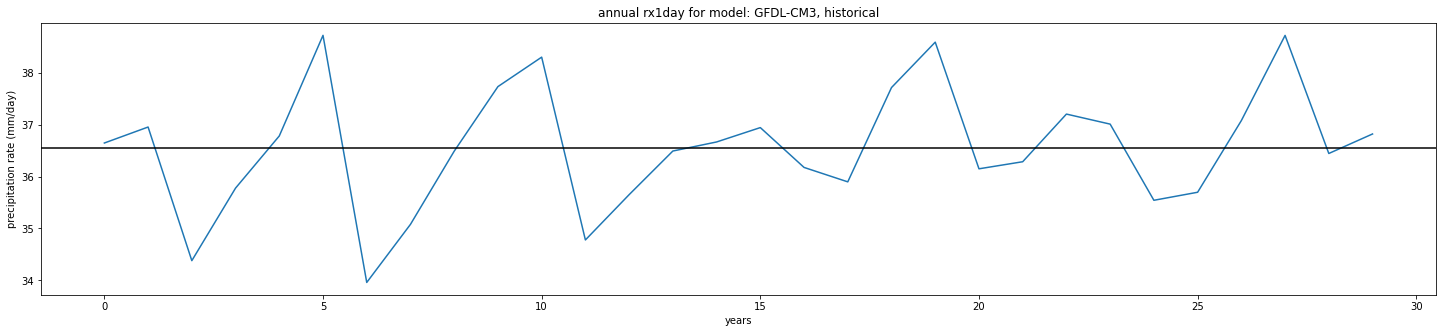

In [37]:
plt.figure(figsize= (25,5))
plt.plot(rxday.rx1day.weighted(np.cos(np.deg2rad(precip.lat))).mean(dim=('lat','lon')))
plt.title('annual rx1day for model: ' + model + ', ' + experiment)
plt.ylabel('precipitation rate (mm/day)')
plt.xlabel('years')
plt.axhline(y=rxday.rx1day.weighted(np.cos(np.deg2rad(precip.lat))).mean(dim=('time','lat','lon')), color='k')

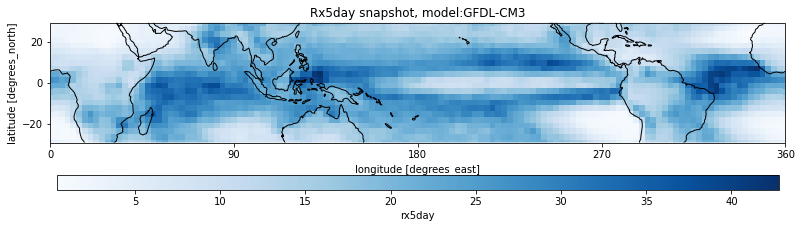

In [10]:
plot_snapshot(rxday.rx5day.mean(dim='time'), 'Blues', 'Rx5day', model)

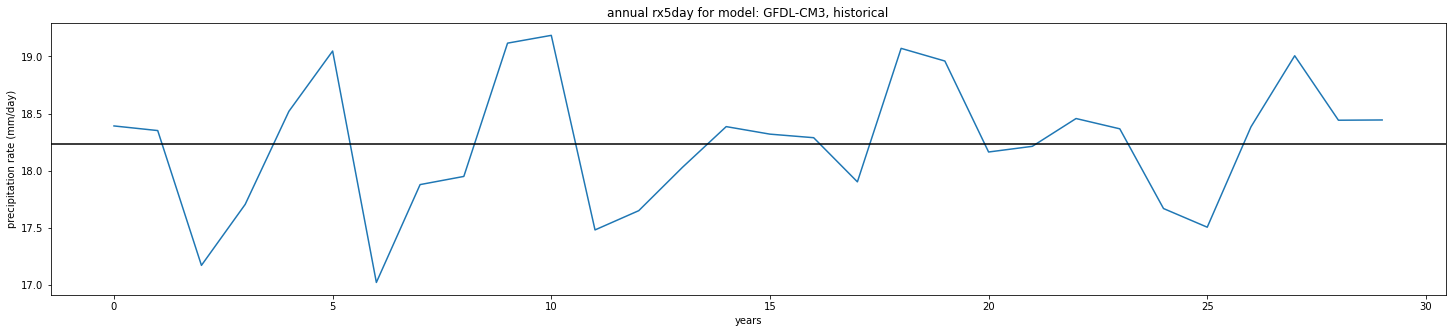

In [38]:
plt.figure(figsize= (25,5))
plt.plot(rxday.rx5day.weighted(np.cos(np.deg2rad(precip.lat))).mean(dim=('lat','lon')))
plt.title('annual rx5day for model: ' + model + ', ' + experiment)
plt.ylabel('precipitation rate (mm/day)')
plt.xlabel('years')
plt.axhline(y=rxday.rx5day.weighted(np.cos(np.deg2rad(precip.lat))).mean(dim=('time','lat','lon')), color='k')

## extras

In [25]:
# pr_percentileSeason = pr_percentile.groupby('time.season').mean(dim='time')
# pr_percentileMonth = pr_percentiles.pr99.resample(time='M').mean(dim='time')
# mse_monthly = pr_percentile.groupby('time.month').mean(dim ='time').plot()